# Email Spam Detection Project

**Objective:** The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).

## Import data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
email_data=pd.read_csv("C:/Users/AJVAD K/Desktop/Internship/coders cave/emails_data.csv")

In [3]:
email_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
email_data.isnull().sum()

text    0
spam    0
dtype: int64

In [5]:
data=email_data

## Preprocessing

In [6]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk

In [6]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string







In [9]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    
    return text


In [10]:
# Apply the preprocessing function to the email text column
data['text'] = data['text'].apply(preprocess_text)

In [13]:
def preprocess_text1(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Rejoin the cleaned tokens into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [14]:
# Apply the preprocessing function to the email text column
data['text'] = data['text'].apply(preprocess_text1)

In [15]:
data.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


<AxesSubplot:>

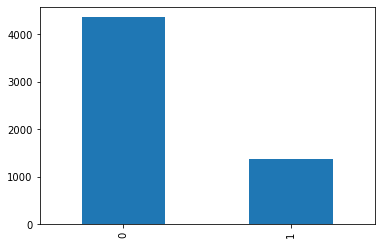

In [18]:
data["spam"].value_counts().plot(kind="bar")

## Feature extraction

In [19]:


from sklearn.feature_extraction.text import TfidfVectorizer



# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust 'max_features' as needed



In [20]:
# Get the TF-IDF feature names
feature_names = tfidf_vectorizer.get_feature_names()

# Convert the TF-IDF features into a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

# Optionally, you can add the TF-IDF features to your original DataFrame
data = pd.concat([data, tfidf_df], axis=1)



In [21]:
data.head()

,text,spam,00,000,01,02,03,04,05,06,...,write,wrote,www,yahoo,ye,year,yesterday,yet,york,zimin
0,subject natur irresist corpor ident lt realli ...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,subject stock trade gunsling fanni merril muzo...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.683053,0.0,0.0,0.000000,0.0,0.0
2,subject unbeliev new home made easi im want sh...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,subject 4 color print special request addit in...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,subject money get softwar cd softwar compat gr...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.318892,0.0,0.0


In [30]:
data.shape

(5728, 1002)

## Importing relevant libraries

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Split data

In [37]:
# Split the data into features (TF-IDF) and labels (spam or not)
X = data['text']  
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## TF-IDF Vectorization

In [39]:

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust 'max_features' as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Create and train Naive Bayes

In [40]:

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

## Create and train SVM

In [41]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

## Create and train Random Forest

In [42]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

## Make predictions for each classifier

In [43]:

y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
y_pred_rf = rf_classifier.predict(X_test_tfidf)


## Evaluate the models

In [44]:

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Naive Bayes Accuracy:", accuracy_nb)
print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)

Naive Bayes Accuracy: 0.9720767888307156
SVM Accuracy: 0.9851657940663177
Random Forest Accuracy: 0.9781849912739965


## Other scores

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a list of classifiers
classifiers = [nb_classifier, svm_classifier, rf_classifier]
classifier_names = ["Naive Bayes", "SVM", "Random Forest"]

# Create empty dictionaries to store metrics for each classifier
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
classification_reports = {}

# Iterate over classifiers and calculate metrics
for classifier, name in zip(classifiers, classifier_names):
    y_pred = classifier.predict(X_test_tfidf)
    
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred)

# Print the evaluation metrics for each classifier
for name in classifier_names:
    print(name + ":")
    print(f"Accuracy: {accuracy_scores[name]}")
    print(f"Precision: {precision_scores[name]}")
    print(f"Recall: {recall_scores[name]}")
    print(f"F1 Score: {f1_scores[name]}")
    print("Classification Report:\n", classification_reports[name])
    print()


Naive Bayes:
Accuracy: 0.9720767888307156
Precision: 0.9742647058823529
Recall: 0.9137931034482759
F1 Score: 0.9430604982206406
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.97      0.91      0.94       290

    accuracy                           0.97      1146
   macro avg       0.97      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146


SVM:
Accuracy: 0.9851657940663177
Precision: 0.9823321554770318
Recall: 0.9586206896551724
F1 Score: 0.9703315881326352
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.96      0.97       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146


Random Forest:
Accuracy: 0.9781849912739965
Prec

## Hyper parameter tuning on SVM

In [46]:

from sklearn.model_selection import  GridSearchCV

# Create an SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Different values of C (regularization parameter)
    'kernel': ['linear', 'rbf'],  # Different kernel types
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new SVM model with the best hyperparameters
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions with the best model
y_pred = best_svm_classifier.predict(X_test_tfidf)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy: {accuracy}")
print("Best Model Classification Report:\n", classification_rep)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Model Accuracy: 0.987783595113438
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.96      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



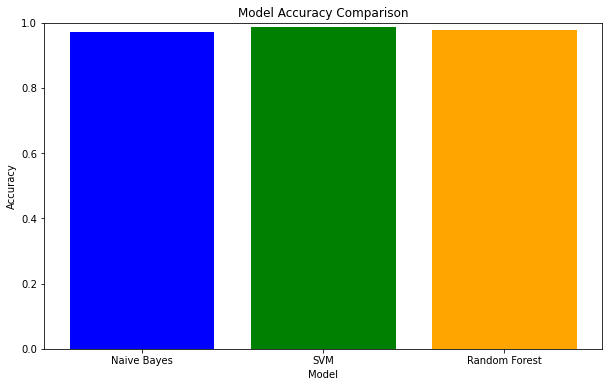

In [49]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ["Naive Bayes", "SVM", "Random Forest"]
accuracies = [accuracy_nb, accuracy_svm, accuracy_rf]

# Create a bar chart to visualize accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1.0)  # Set the y-axis limit
plt.show()


## Fit best model and plot roc curve


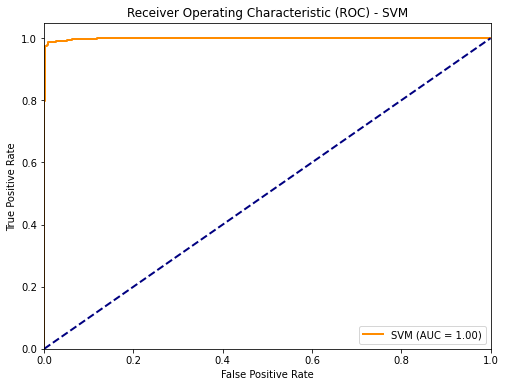

In [51]:

from sklearn.metrics import roc_curve, auc

# Create an SVM classifier with specific hyperparameters
svm_classifier = SVC(C=10, kernel='rbf', probability=True)  # Set probability=True for ROC curve

# Fit the SVM classifier with training data
svm_classifier.fit(X_train_tfidf, y_train)

# Calculate the predicted probabilities for the SVM model
predicted_probabilities = svm_classifier.predict_proba(X_test_tfidf)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc='lower right')
plt.show()


## Conclusion

**In our email spam detection project, the Support Vector Machine (SVM) model with specific hyperparameters ('C': 10, 'kernel': 'rbf') has emerged as the best-performing model. It achieved a high accuracy of approximately 98.78%, indicating its strong capability to classify spam and non-spam emails effectively.<br><br>
The process of hyperparameter tuning significantly improved the model's performance, highlighting the importance of selecting the right hyperparameters. It's crucial to consider not only accuracy but also other evaluation metrics such as precision, recall, and ROC curves for a comprehensive assessment of the model's performance.**